# Time-Series Analysis

## Content list:

#### 1. Import libraries & data 
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity - Dickey Fuller Test
#### 5. Stationarizing the Federal Reserve Economic Data
#### 6. Export data & visualizations

### 1. Importing your libraries & data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") # Disable warnings
plt.style.use('fivethirtyeight') # styling option for how plots will appear

In [2]:
# create path variable

path = r'/Users/jsok/US Education Analysis'

In [3]:
# read csv file with time series data
# 20 years of data for education finance data (funding and spending) and enrollment

data = pd.read_csv(os.path.join(path,'02 Data','ustates_tsa.csv'))

In [4]:
data.head()

,Year,Total_Revenue,Total_Expenditure,Grades_All
0,1997,311173634,315175161,46049786
1,1998,331023835,335668054,46466696
2,1999,353923639,359735487,46779955
3,2000,378720797,385318602,47134614
4,2001,407362729,415988745,47596485


##### These columns were selected because they presented the most consistent data in terms of years.  For instance, Test Scores were recorded periodically, and hence, too many missing values in between years.

In [5]:
data.shape

(20, 4)

In [6]:
data.columns

Index(['Year', 'Total_Revenue', 'Total_Expenditure', 'Grades_All'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

### 2. Subsetting, wrangling, and cleaning time-series data

In [8]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [9]:
data_sub = data[['Year','Total_Revenue']]

In [10]:
data_sub.head()

,Year,Total_Revenue
0,1997,311173634
1,1998,331023835
2,1999,353923639
3,2000,378720797
4,2001,407362729


In [11]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Year'], format='%Y') # Create a datetime column from "Year"
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Year'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Total_Revenue
datetime,
1997-01-01,311173634
1998-01-01,331023835
1999-01-01,353923639
2000-01-01,378720797
2001-01-01,407362729


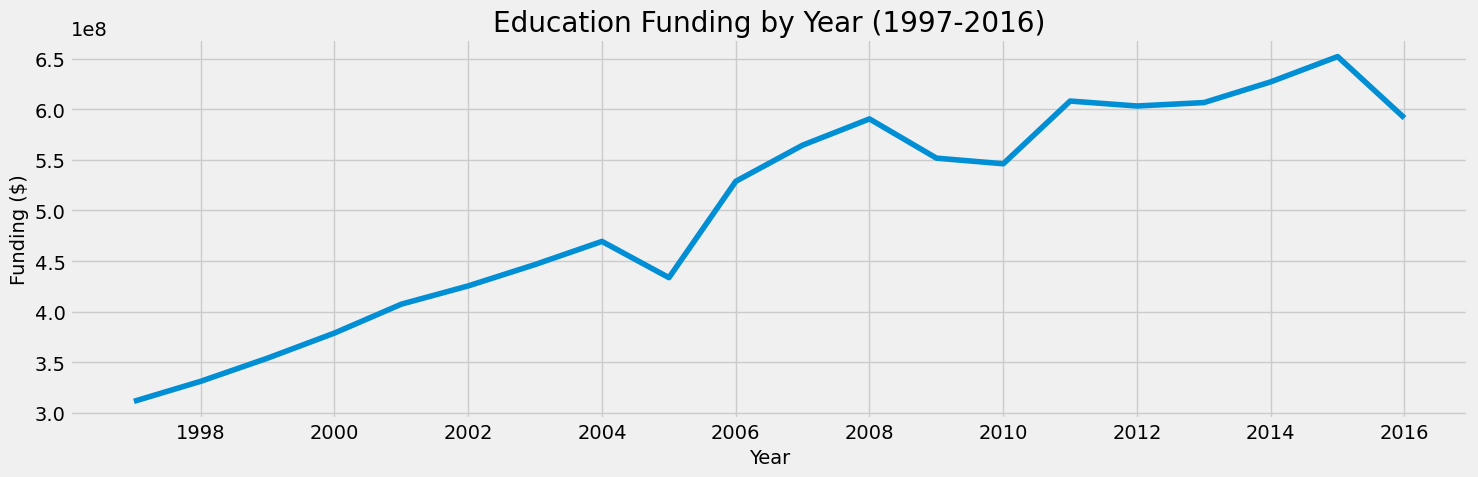

In [12]:
# Plot the data using matplotlib.

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

ed_funding_line = plt.figure(figsize=(15,5), dpi=100) 

plt.title('Education Funding by Year (1997-2016)')
plt.xlabel('Year')
plt.ylabel('Funding ($)')
plt.plot(data_sub)

# ensure the visual image fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) 

In [13]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Total_Revenue    0
dtype: int64

In [14]:
# Check for duplicates --> none

dups = data_sub.duplicated()
dups.sum()

0

### 3. Time-series analysis: decomposition

In [15]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [16]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

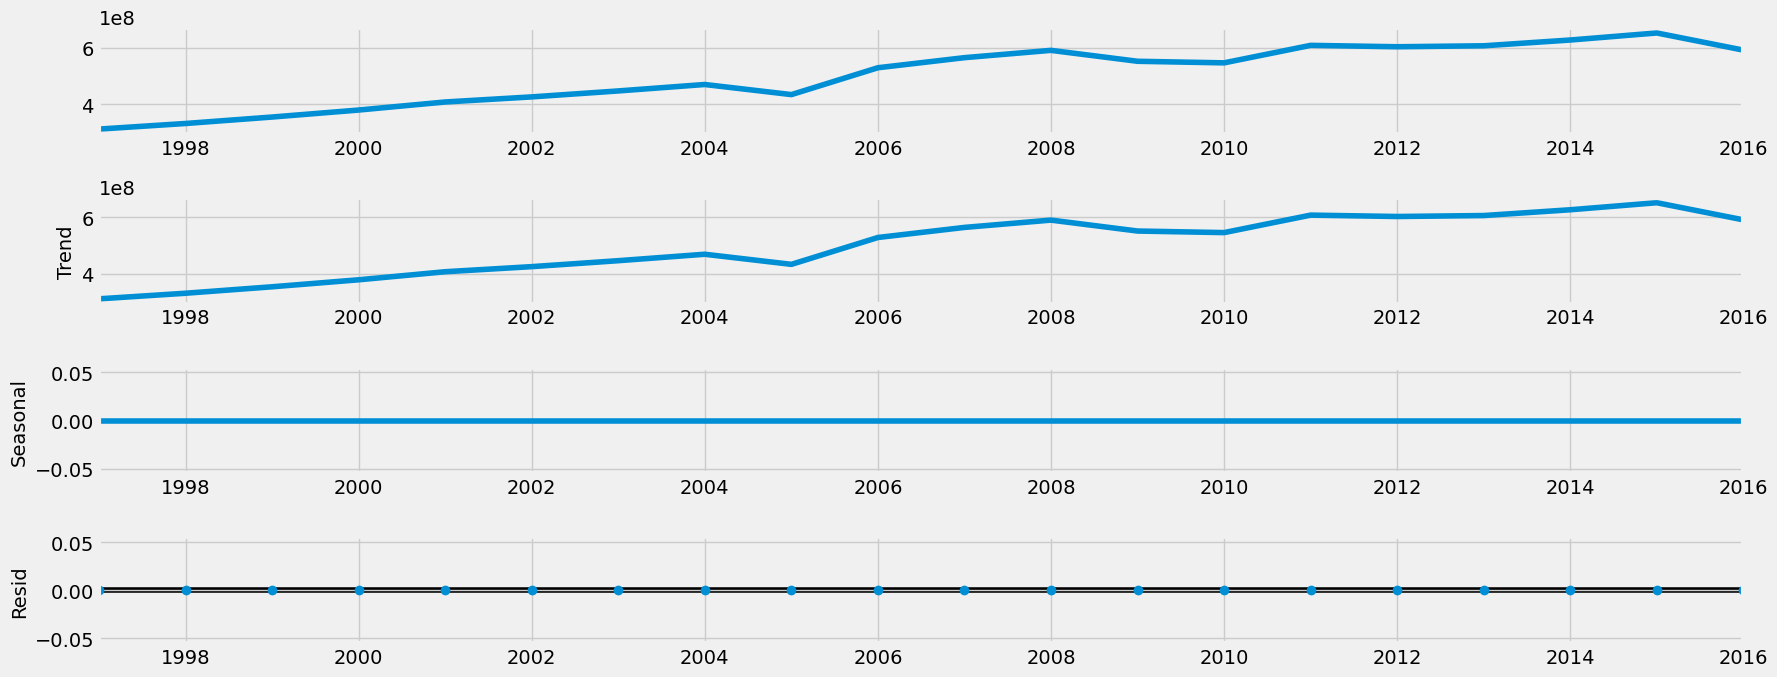

In [17]:
# Plot the separate components

decomposition.plot()
plt.show()

##### According to the decomposition graphs above, the original data and the trend are identical, seasonality and residual graphs do not show "noise" which indicates data won't need to be smoothed and is stationary (at least visibly)!

### 4. Testing for stationarity - Dickey Fuller Test

In [18]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Total_Revenue'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.276730
p-value                         0.015951
Number of Lags Used             8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


##### According to the test statistic, I can reject the null hypothesis because it is less than the Critical Values of 5% and 10%!  Also, the p-value < 0.05!!

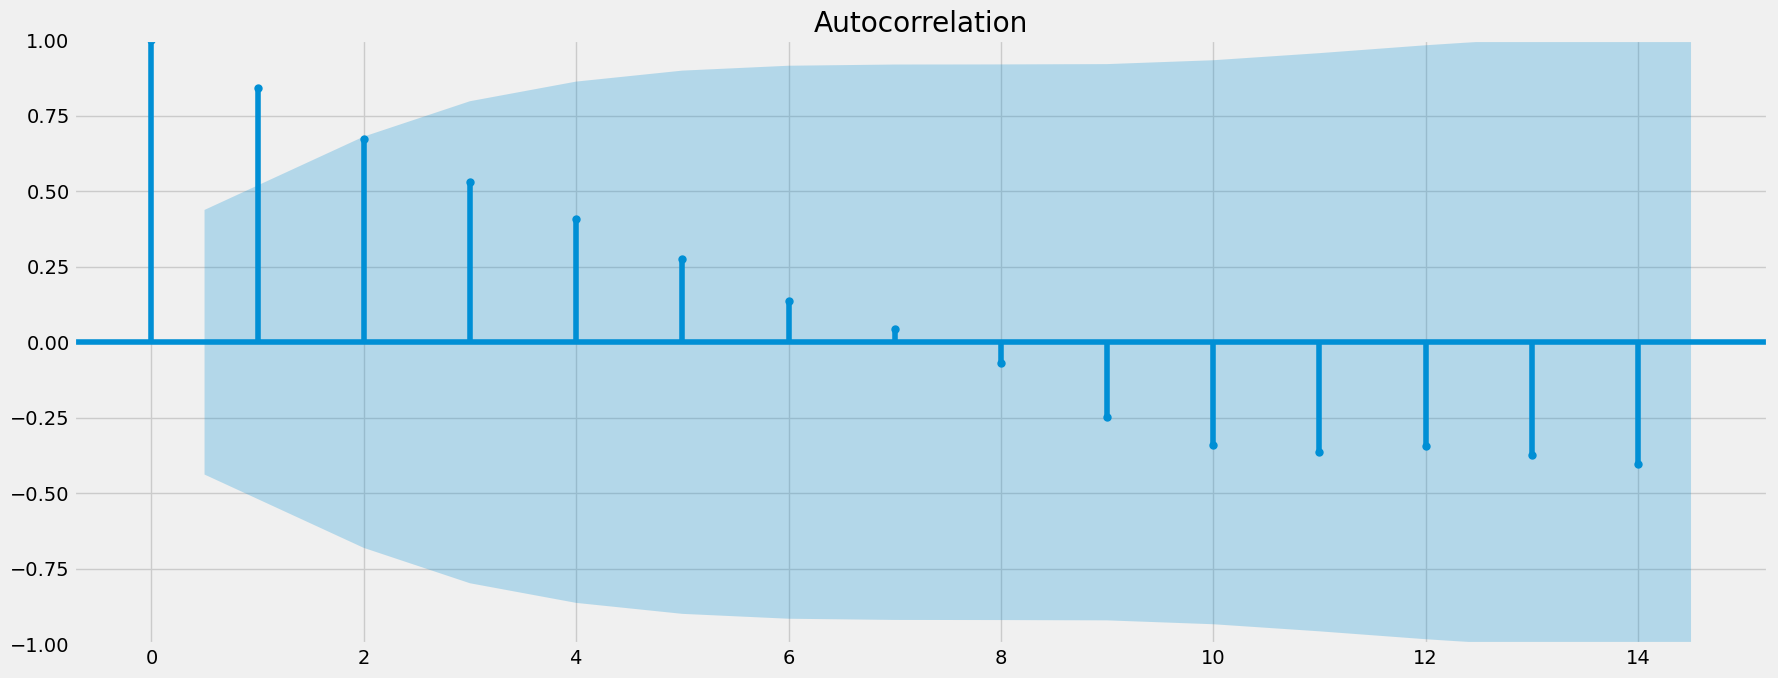

In [19]:
# Check out a plot of autocorrelations

# Here, you import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)
plt.show()

##### By the autocorrelation graph above, only 2 significant lags are above the blue-shaded confidence interval.  Thus, by the statistics from the Dickey-Fuller Stationarity test and the Autocorrelation graph, my data is stationary.

### 5. Stationarizing the Revenue data (commented out)

In [20]:
# The 'data_sub.shift(1)' function turns the observation to 't-1', making the whole thing 't - (t -1)'

#data_diff = data_sub - data_sub.shift(1) 

In [21]:
# Remove the missing values that came about as a result of the differencing. 
# Remove these or you won't be able to run the Dickey-Fuller test.

#data_diff.dropna(inplace = True) 

In [22]:
#data_diff.head()

In [23]:
#data_diff.columns

In [24]:
# Check out what the differencing did to the time-series curve

#plt.figure(figsize=(15,5), dpi=100)
#plt.plot(data_diff)

In [25]:
#dickey_fuller(data_diff)

In [26]:
#plot_acf(data_diff)
#plt.show()

## 6. Export data & visualizations

In [27]:
ed_funding_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','ed_funding_line_graph.png'))

In [28]:
data.to_csv(os.path.join(path,'02 Data','ustates_tsa_2.csv'))
data_sub.to_csv(os.path.join(path,'02 Data','ustates_SUB_tsa.csv'))